In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
df = pd.read_csv("./Datasets-Question1/dataset1/Train1.csv", header=None)
tr_labels = df[2].add(0.1).astype(np.int8).to_numpy()
tr_data = df[[0,1]].to_numpy()

## Data Visualization

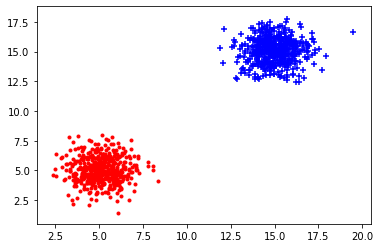

In [15]:
# configuration
color = ['red' , 'blue']
marker = ['.', '+']

ax = plt.axes()

for x , y in zip(tr_data, tr_labels):
    ax.scatter(x[0], x[1], c=color[y], marker=marker[y])

plt.show()